<a href="https://colab.research.google.com/github/Anjana2002/Language-Identification-for-Malayalam-English-Code-Mixed-Text/blob/main/modeling/distilbert_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CamemBert MODELING

In [1]:
!pip install transformers
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 68.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import ast
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import torch
import logging
from simpletransformers.ner import NERModel

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
df = pd.read_csv('ner_dataset.csv')
df["words"] = df["words"].fillna("").astype(str)
df.head()


,sentence_id,words,labels
0,1,nayanthara,mal
1,1,kettiyathin,mal
2,1,shesham,mal
3,1,kanunnavar,mal
4,2,00:12,univ


In [4]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Training size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

# Extract unique labels from the dataset
unique_labels = list(df["labels"].unique())
print("Unique labels in the dataset:", unique_labels)

Training size: 263461
Validation size: 32933
Test size: 32933
Unique labels in the dataset: ['mal', 'univ', 'eng', 'mix', 'acr']


In [5]:
model_args = {
    "overwrite_output_dir": True,
    "reprocess_input_data": True,
    "save_steps": -1,
    "num_train_epochs": 5,
    "train_batch_size": 16,
    "eval_batch_size": 16,
    "max_seq_length": 128,
    "learning_rate": 2e-5,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "evaluate_during_training": True,
    "output_dir": "outputs/",
    "best_model_dir": "outputs/best_model/",
    "labels_list": unique_labels,  # Add this line with your labels
}

distil = NERModel(
    model_type="bert",
    model_name="distilbert-base-uncased",
    args=model_args,
    use_cuda=torch.cuda.is_available()
)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [6]:
train_data = train_df[["sentence_id", "words", "labels"]]
val_data = val_df[["sentence_id", "words", "labels"]]
print(train_data.head())
print(val_data.head())

        sentence_id   words labels
199781        33943  aanenn    mal
131447        21490       %   univ
204812        34786     dhe    mal
27121          4977    next    eng
85254         14281   robin    eng
        sentence_id      words labels
258702        44189        njn    mal
56139          9908      react    eng
198375        33702          🤣   univ
324160        53398  thonnunn🤗    mal
263637        45105      😍😍😂😂😀   univ


In [7]:
# Ensure labels are consistent with the defined `labels_list`
assert set(train_data["labels"].unique()).issubset(set(unique_labels)), "Mismatch in train labels"
assert set(val_data["labels"].unique()).issubset(set(unique_labels)), "Mismatch in val labels"

In [8]:
distil.train_model(train_data, eval_data=val_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:758: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 5:   0%|          | 0/3305 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:782: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:1303: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: eng seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: mal seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: mix seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: univ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/3305 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/3305 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/3305 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/3305 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

(16525,
 defaultdict(list,
             {'global_step': [2000,
               3305,
               4000,
               6000,
               6610,
               8000,
               9915,
               10000,
               12000,
               13220,
               14000,
               16000,
               16525],
              'train_loss': [0.2743070423603058,
               0.17707788944244385,
               0.2853042483329773,
               0.09128667414188385,
               0.18344473838806152,
               0.07729239016771317,
               0.07874803245067596,
               0.12038031965494156,
               0.17196011543273926,
               0.16822172701358795,
               0.1449512541294098,
               0.11623349785804749,
               0.07605914026498795],
              'eval_loss': [0.19783925874447772,
               0.1670292967974092,
               0.14263665121009467,
               0.1209787172255315,
               0.1234885132171989,
        

In [9]:
example_sentence = "njn enn avide poyi, videoil njn kandu comedyu love 123 wait"
predictions, raw_outputs = distil.predict([example_sentence])  # Pass it as a list of strings
print("Predictions:", predictions)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Predictions: [[{'njn': 'mal'}, {'enn': 'mal'}, {'avide': 'mal'}, {'poyi,': 'mal'}, {'videoil': 'mix'}, {'njn': 'mal'}, {'kandu': 'mal'}, {'comedyu': 'mix'}, {'love': 'eng'}, {'123': 'eng'}, {'wait': 'eng'}]]


/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:1643: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [10]:
result, model_outputs, predictions = distil.eval_model(val_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

In [11]:

print("Evaluation Results:")
print(f"Precision: {result['precision']:.4f}")
print(f"Recall: {result['recall']:.4f}")
print(result)

Evaluation Results:
Precision: 0.9448
Recall: 0.9414
{'eval_loss': 0.11149889036691114, 'precision': 0.944793388429752, 'recall': 0.9414046773780331, 'f1_score': 0.9430959888538534}


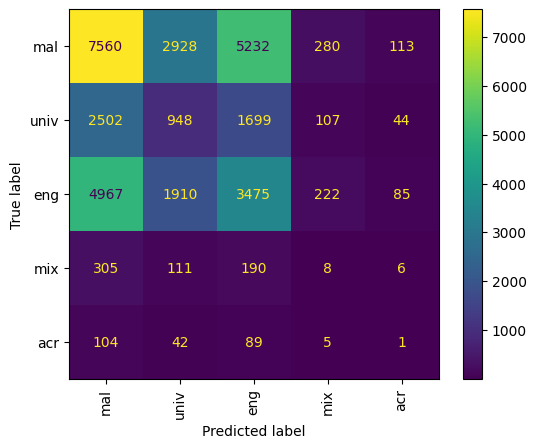

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from itertools import chain
true_labels = val_data["labels"].values.flatten()
predictions_flat = list(chain.from_iterable(predictions))
cm = confusion_matrix(true_labels, predictions_flat, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap="viridis", xticks_rotation="vertical")
plt.show()

